# Text Classification
 20 Newsgroups dataset provided by Scikit-learn

In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

In [9]:
# Load the dataset
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'talk.politics.mideast', 'talk.politics.guns', 'comp.graphics', 'sci.space']
news_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# # Convert to a DataFrame
df = pd.DataFrame({'Text': news_data.data, 'Category': news_data.target})

# # Map target numbers to category names
df['Category'] = df['Category'].map(lambda x: news_data.target_names[x])

print(df.head())


                                                Text            Category
0  \n\n  Gerald, look at what happened to the Sta...    rec.sport.hockey
1  \nIs it? As far as I know, tear gas, especiall...  talk.politics.guns
2  \nSuch as?  Drunk drivers get back on the road...  talk.politics.guns
3  I Love it how all of these people are "blaming...  rec.sport.baseball
4  \n\nAs an Amateur Radio operator (VHF 2metres)...           sci.space


# Preprocess the Data

In [10]:
import nltk
from nltk.corpus import stopwords
import string


nltk.download('stopwords')



# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned_Text'] = df['Text'].apply(lambda x: preprocess_text(str(x)))
print(df[['Text', 'Cleaned_Text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Text  \
0  \n\n  Gerald, look at what happened to the Sta...   
1  \nIs it? As far as I know, tear gas, especiall...   
2  \nSuch as?  Drunk drivers get back on the road...   
3  I Love it how all of these people are "blaming...   
4  \n\nAs an Amateur Radio operator (VHF 2metres)...   

                                        Cleaned_Text  
0  gerald look happened stars dallas gerald alber...  
1  far know tear gas especially large concentrati...  
2  drunk drivers get back road time kill seems dr...  
3  love people blaming phillies success weak divi...  
4  amateur radio operator vhf 2metres like keep g...  


# Split Data into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Category'], test_size=0.2, random_state=42)

print(f"Training size: {len(X_train)}, Test size: {len(X_test)}")

Training size: 4642, Test size: 1161


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")

TF-IDF matrix shape: (4642, 5000)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.87      0.91      0.89       179
   rec.sport.baseball       0.87      0.83      0.85       214
     rec.sport.hockey       0.90      0.86      0.88       199
            sci.space       0.79      0.86      0.82       217
   talk.politics.guns       0.88      0.89      0.89       161
talk.politics.mideast       0.90      0.85      0.88       191

             accuracy                           0.87      1161
            macro avg       0.87      0.87      0.87      1161
         weighted avg       0.87      0.87      0.87      1161



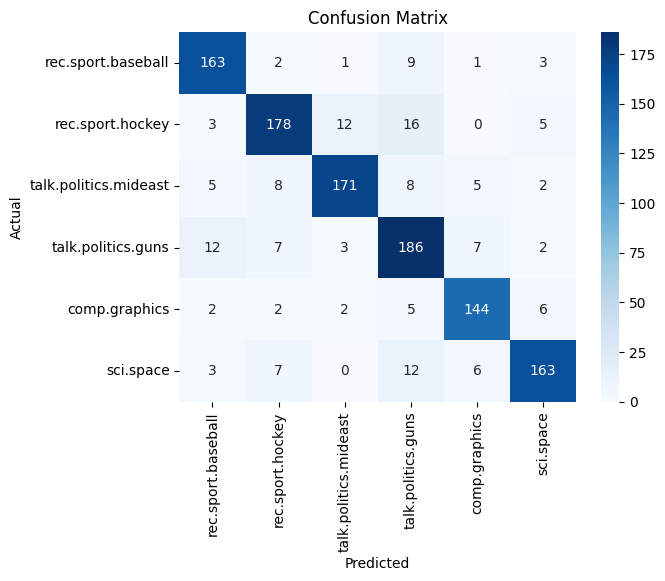

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# TEST

In [19]:
# Test Cases
test_sentences = [
    "NASA has discovered a new exoplanet in a distant galaxy.",
    "The government has passed a new gun control policy amidst debates.",
    "The graphics in the new video game are truly breathtaking.",
    "The game match between the Yankees and the Red Sox was intense.",
    "Discussions about the political situation in the Middle East are ongoing.",
    "Hockey players are training hard for the upcoming championship.",
    "The company has launched a new software for 3D rendering.",
    "Astronomers have made significant progress in space exploration.",
    "The protests against gun laws have gained widespread attention.",
    "The hockey match was canceled due to bad weather.",
        "The game was canceled due to bad weather.",
]

# Transform and Predict
test_sentences_tfidf = vectorizer.transform(test_sentences)
predicted_categories = classifier.predict(test_sentences_tfidf)

# Print Predictions
for sentence, category in zip(test_sentences, predicted_categories):
    print(f"Sentence: {sentence}")
    cat = category.split('.')[-1]
    print(f"Predicted Category: {cat.capitalize()}\n")

Sentence: NASA has discovered a new exoplanet in a distant galaxy.
Predicted Category: Space

Sentence: The government has passed a new gun control policy amidst debates.
Predicted Category: Guns

Sentence: The graphics in the new video game are truly breathtaking.
Predicted Category: Graphics

Sentence: The game match between the Yankees and the Red Sox was intense.
Predicted Category: Baseball

Sentence: Discussions about the political situation in the Middle East are ongoing.
Predicted Category: Mideast

Sentence: Hockey players are training hard for the upcoming championship.
Predicted Category: Hockey

Sentence: The company has launched a new software for 3D rendering.
Predicted Category: Graphics

Sentence: Astronomers have made significant progress in space exploration.
Predicted Category: Space

Sentence: The protests against gun laws have gained widespread attention.
Predicted Category: Guns

Sentence: The hockey match was canceled due to bad weather.
Predicted Category: Hocke